In [1]:
from EBC import EBC

import matplotlib.pyplot as plt
import numpy as np

In [2]:
##https://stackoverflow.com/questions/17809817/cantor-ternary-set-in-python-or-c
def cantor(n):
    return [0.] + cant(0., 1., n) + [1.]

def cant(x, y, n):
    if n == 0:
        return []

    new_pts = [2.*x/3. + y/3., x/3. + 2.*y/3.]
    return cant(x, new_pts[0], n-1) + new_pts + cant(new_pts[1], y, n-1)

figsize, dpi = (12, 10), 200
fontsize = 24
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

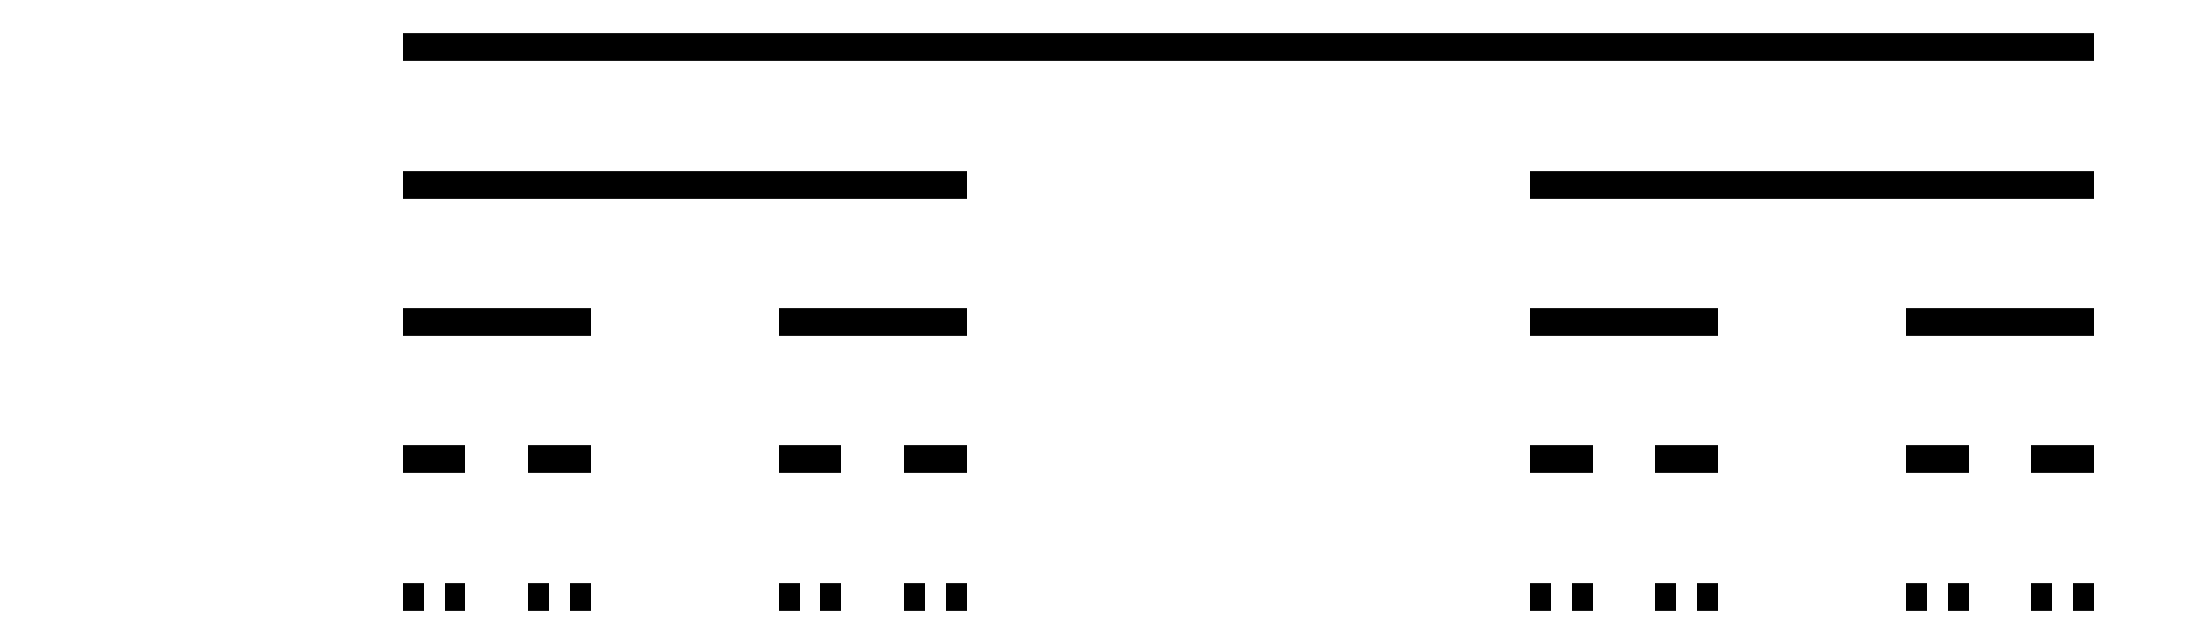

In [3]:
parameters = []
max_level = 5
plt.figure(0, figsize=(12, 4), dpi=dpi)
for n in range(max_level):
    points = np.array(cantor(n))
    points = np.split(points, len(points) // 2)
    for point in points:
        plt.hlines(-n / 1, point[0], point[1], color='black', linewidth=10)
    mus = [(np.mean(point), (point[1] - point[0]), (1 / (n+1))) for point in points]
    #parameters.append((mus, np.ones_like(mus) * (n + 2) ** 6))
    parameters.append(mus)
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)    
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_ylabel(' . ', fontsize=14, labelpad=95, color='white')
#plt.yticks(-np.arange(max_level), labels=['     ' for _ in range(max_level  )])
#ax.get_xaxis().set_ticks()
#plt.yticks(fontsize=14)
plt.savefig('cantor.pdf', bbox_inches='tight')

In [4]:
parameters = np.vstack(parameters)[1:]
xs = np.linspace(-0.0, 1.0, 1000)[:, None]

offset = parameters.shape[0]
contributions = np.maximum(0,  np.ceil(np.abs(xs - parameters[:, 0]) - parameters[:, 1] / 2)) # parameters[:, 2] *
potential_energy = np.minimum(0, (np.sum(contributions, axis=-1) - offset) / (max_level - 1))

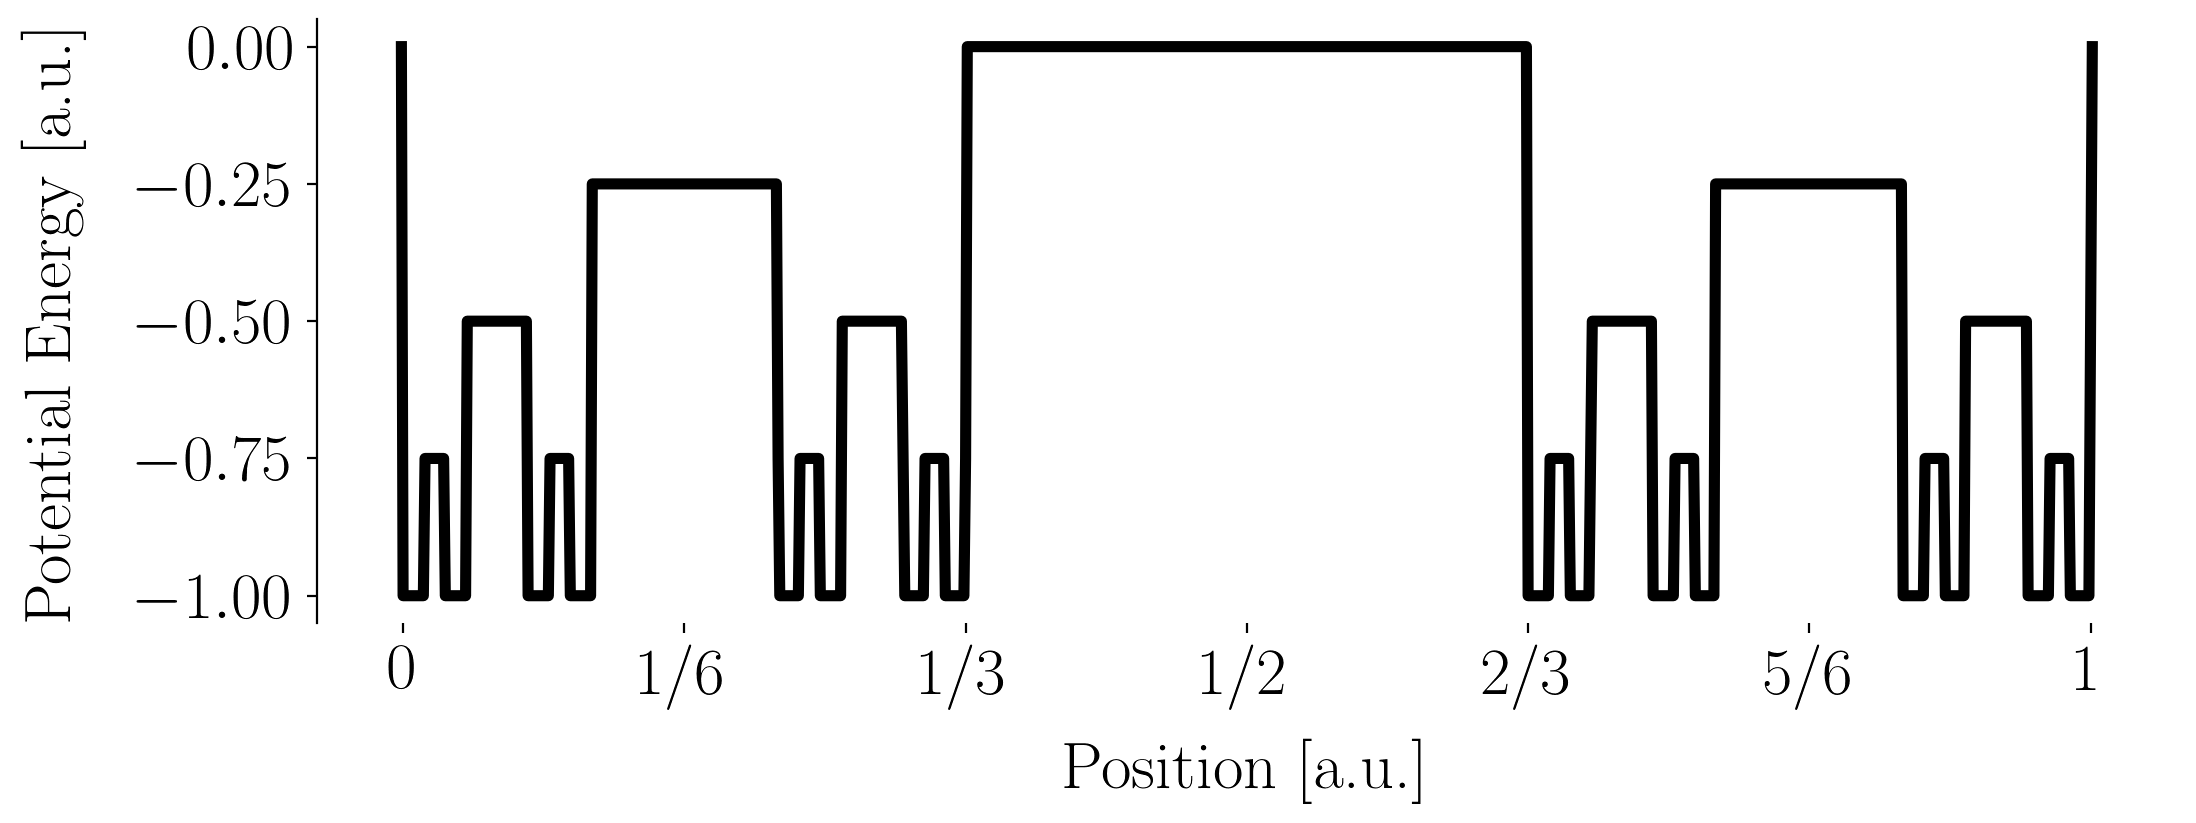

In [5]:
plt.figure(0, figsize=(12, 4), dpi=dpi)
plt.plot(np.concatenate(([xs[0] - 1e-3], xs, [xs[-1] + 1e-3]), axis=0), np.concatenate(([0], potential_energy, [0]), axis=0), color='black', linewidth=4)
ax = plt.gca()
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)    
ax.set_ylabel('Potential Energy [a.u.]', fontsize=fontsize, labelpad=18)
ax.set_xlabel('Position [a.u.]', fontsize=fontsize, labelpad=10)
ax.get_yaxis().set_ticks(np.linspace(-1, 0, 5), )
ax.get_xaxis().set_ticks([])
plt.yticks(fontsize=fontsize)
plt.xticks(ticks=[n / 6 for n in range(7)] , labels=[0, str('1/6'), str('1/3'), str('1/2'), str('2/3'), str('5/6'), 1], fontsize=fontsize)
#ax.get_yaxis().set_ticks([])
plt.savefig('potential.pdf', bbox_inches='tight')

In [6]:
ebc = EBC(n_clusters=2, proto_radius=0.0, use_sparse=True)
ebc.fit(xs, potential_energy)

Using 1000 proto clusters.
Using the eigenvector corresponding to an eigenvalue of 0.9999999999999698.


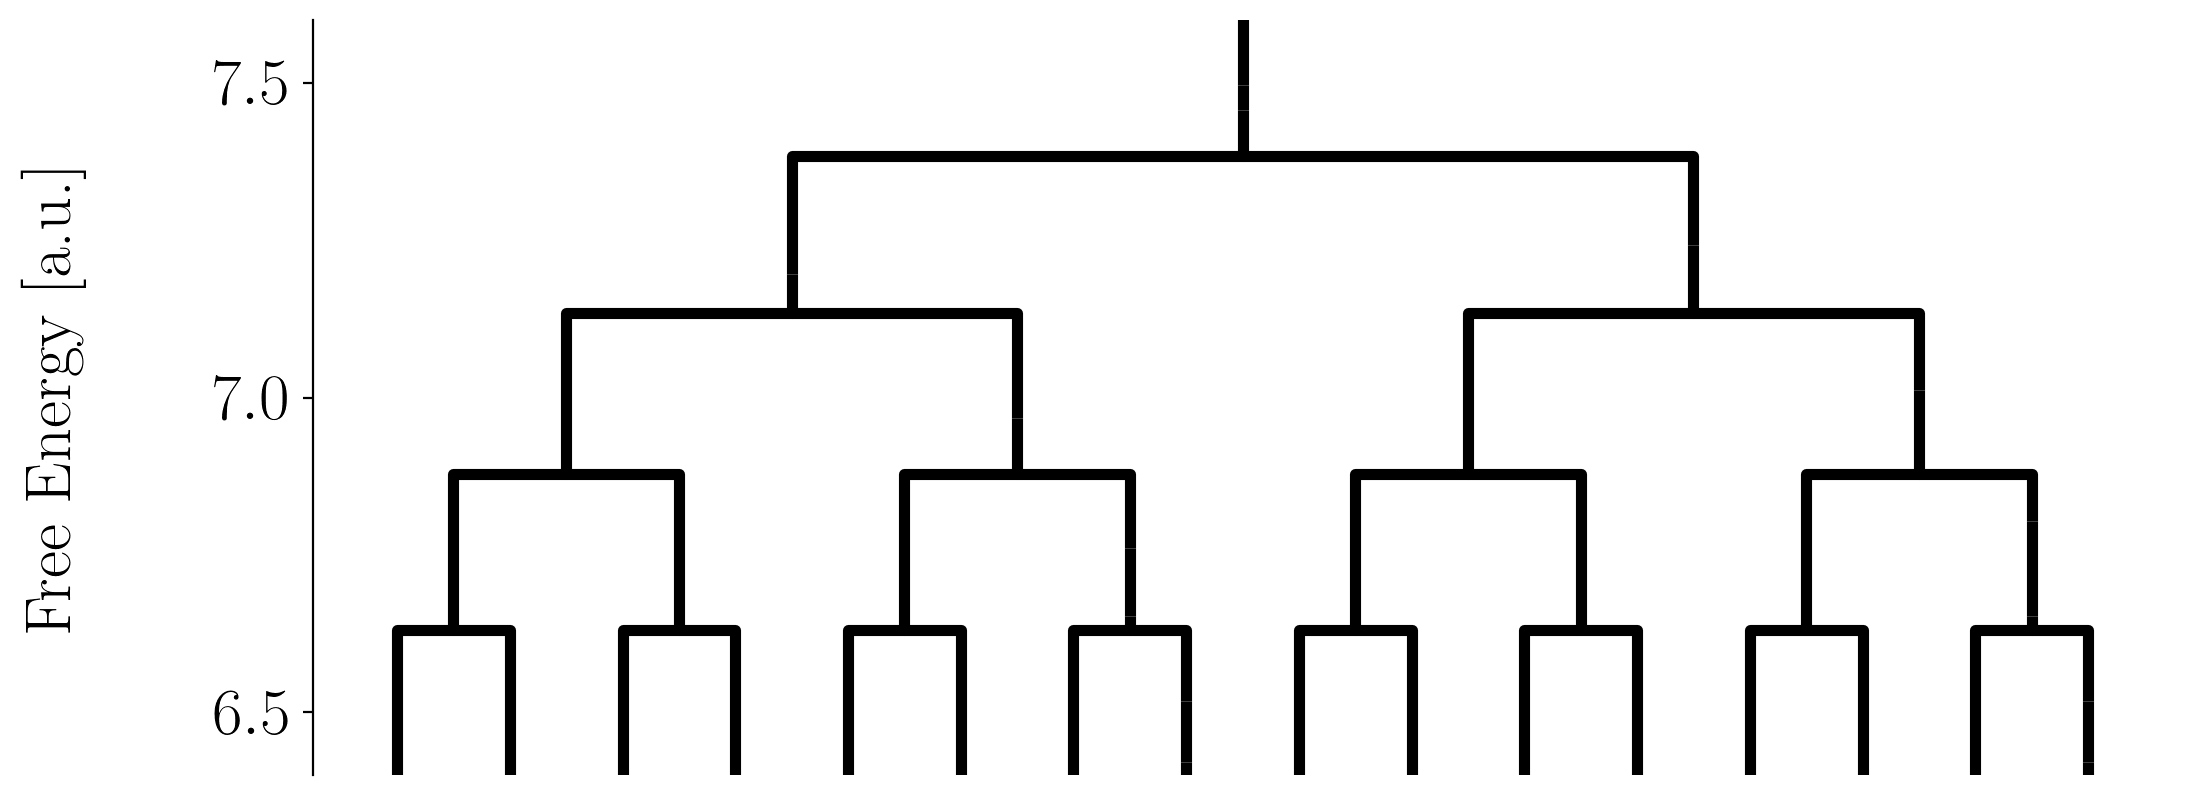

In [7]:
fig = ebc.hierarchical(use_colormap=False, ymin=6.4, ymax=7.6, figsize=(12, 5), dpi=dpi, fontsize=fontsize, labelpad=46)
ax = fig.gca()
ax.get_yaxis().set_ticks([])
ax.set_yticks([6.5, 7.0, 7.5])
plt.yticks(fontsize=fontsize)
fig.savefig('tree.pdf', bbox_inches='tight')